# How Powerful is Advantage? 
This is an analysis of understanding attacking with advantage and disadvantage.

## Background
placeholder for math

In [1]:
import random
import pandas as pd  
import matplotlib.pyplot as plt
from itertools import chain
from gloomhaven.deck import GloomhavenDeck
from gloomhaven.render import render_tables, format_table_to_hmtl

In [2]:
deck = GloomhavenDeck()

In [3]:
attack_data = {}
base_attacks = [1, 2, 3, 4, 5]
samp_size = 100_000

def attacks(samp_size, attack):
    for _ in range(samp_size):
        yield [attack] * 2

attack_data = {}
for val in base_attacks:
    moves = deck.simulate(attacks(samp_size, val))

    base_moves = [vals[0] for vals in moves]
    attack_data[f"base_attack_{val}"] = [dmg for dmg, _ in base_moves]

    dis_adv_moves = [min(vals) for vals in moves]
    attack_data[f"disadv_attack_{val}"] = [dmg for dmg, _ in dis_adv_moves]
    
    adv_moves = [max(vals) for vals in moves]
    attack_data[f"adv_attack_{val}"] = [dmg for dmg, _ in adv_moves]

attack_data = pd.DataFrame(attack_data)

In [4]:
def get_counts(srs: pd.Series):
    srs = srs.value_counts()
    for attack_val in range(srs.index.max()+1):
        if attack_val not in srs.index:
            srs[attack_val] = 0
    srs = srs / samp_size
    srs.sort_index()
    return srs

In [5]:
attack_data.loc[:, attack_data.columns.str.contains("^adv", regex=True)]

,adv_attack_1,adv_attack_2,adv_attack_3,adv_attack_4,adv_attack_5
0,1,2,4,4,4
1,1,2,4,4,10
2,2,4,6,5,6
3,2,1,6,5,7
4,2,2,3,4,10
...,...,...,...,...,...
99995,2,1,4,5,7
99996,2,3,5,3,5
99997,2,4,3,4,6
99998,2,4,6,4,10


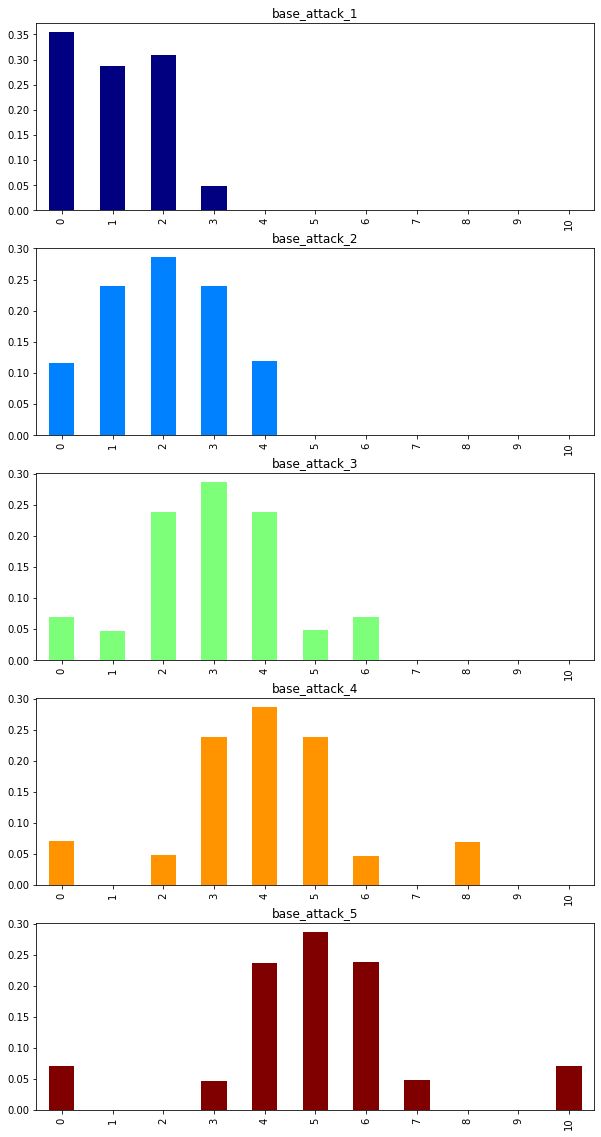

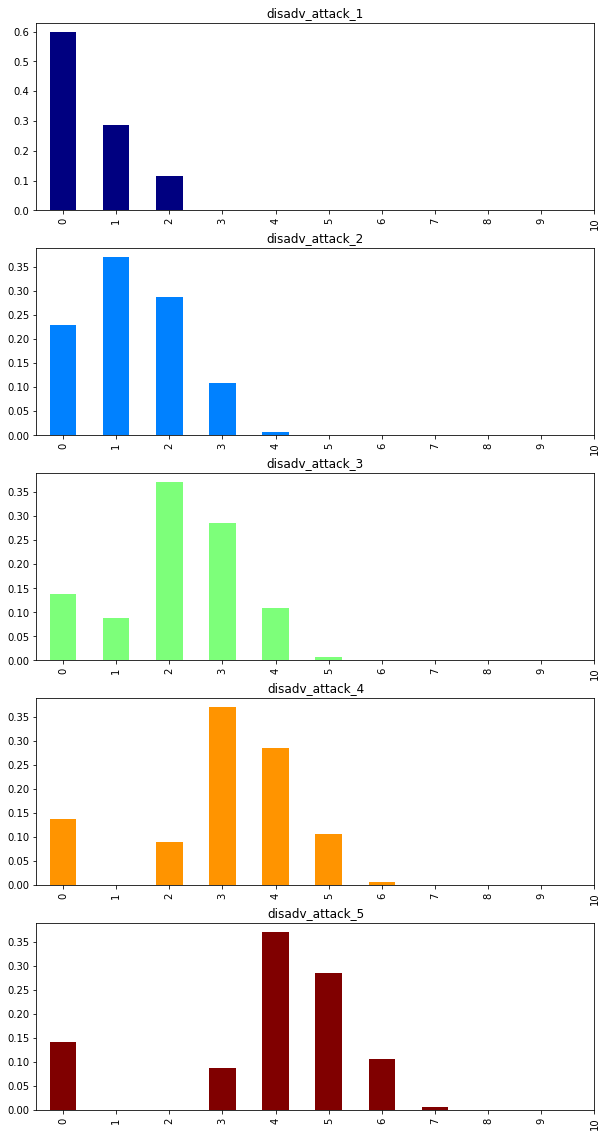

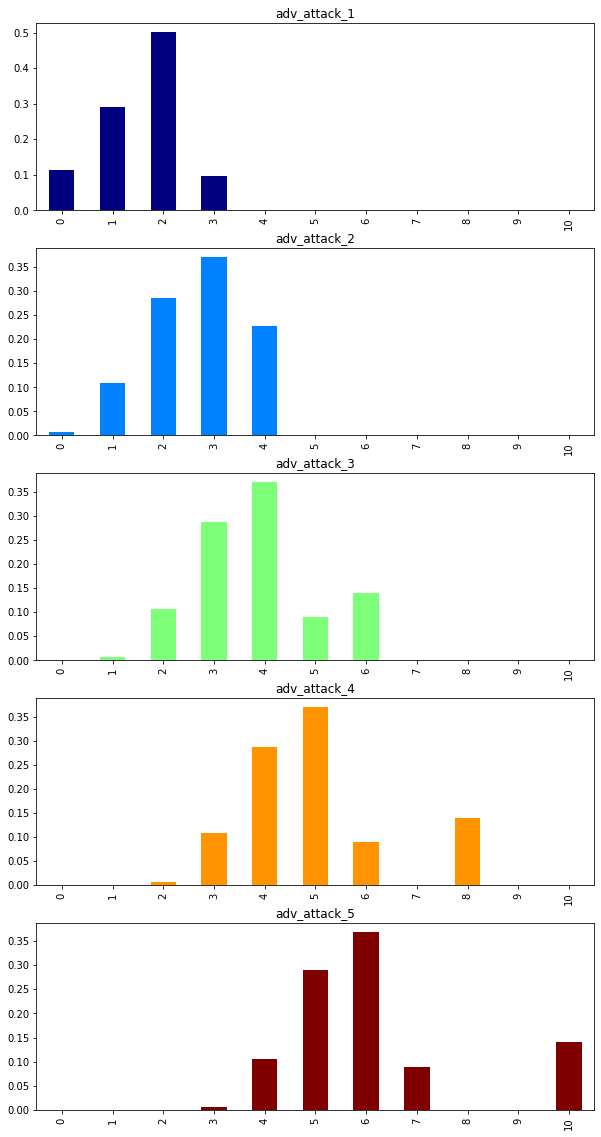

In [6]:
_ = attack_data.loc[:, attack_data.columns.str.contains("base")] \
    .apply(get_counts, axis=0) \
    .plot(
        kind="bar",
        subplots=True, 
        figsize=(10,20),
        legend=False,
        colormap="jet",
        sharex=False,
        xticks=[i for i in range(max(base_attacks)*2+1)],
    )
plt.savefig("../assets/base.jpg")

_ = attack_data.loc[:, attack_data.columns.str.contains("disadv")] \
    .apply(get_counts, axis=0) \
    .plot(
        kind="bar",
        subplots=True, 
        figsize=(10,20),
        legend=False,
        colormap="jet",
        sharex=False,
        xticks=[i for i in range(max(base_attacks)*2+1)],
    )
plt.savefig("../assets/disadvantage.jpg")

_ = attack_data.loc[:, attack_data.columns.str.contains("^adv", regex=True)] \
    .apply(get_counts, axis=0) \
    .plot(
        kind="bar",
        subplots=True, 
        figsize=(10,20),
        legend=False,
        colormap="jet",
        sharex=False,
        xticks=[i for i in range(max(base_attacks)*2+1)],
    )
plt.savefig("../assets/advantage.jpg")

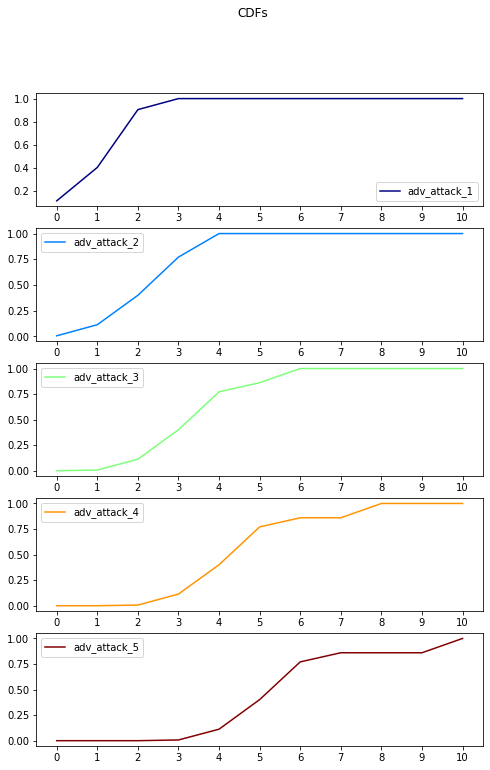

In [7]:
_ = attack_data.loc[:, attack_data.columns.str.contains("^adv", regex=True)] \
    .apply(get_counts, axis=0) \
    .fillna(0) \
    .cumsum() \
    .plot(
        kind="line",
        subplots=True, 
        figsize=(8, 12),
        colormap="jet",
        sharex=False,
        xticks=[i for i in range(max(base_attacks)*2+1)],
        title="CDFs"
    )

tmp = attack_data.apply(lambda x: x.value_counts(normalize=True), axis=0)
missing = [i for i in range(max(tmp.index)) if i not in tmp.index]
for i in missing:
    tmp.loc[i, :] = None
tmp = tmp.fillna(0).cumsum()
tmp.sort_index(axis=0, inplace=True)
tmp_table = format_table_to_hmtl(tmp)

with open("../assets/advantage_cdfs.html", "w") as f:
    f.write(render_tables([("CDFs", tmp_table)]))

In [8]:
# survival function table
1 - tmp.round(2)

,base_attack_1,disadv_attack_1,adv_attack_1,base_attack_2,disadv_attack_2,adv_attack_2,base_attack_3,disadv_attack_3,adv_attack_3,base_attack_4,disadv_attack_4,adv_attack_4,base_attack_5,disadv_attack_5,adv_attack_5
0,0.64,0.40,0.89,0.88,0.77,0.99,0.93,0.86,1.00,0.93,0.86,1.00,0.93,0.86,1.00
1,0.36,0.12,0.60,0.64,0.40,0.89,0.88,0.77,0.99,0.93,0.86,1.00,0.93,0.86,1.00
2,0.05,0.00,0.10,0.36,0.11,0.60,0.64,0.40,0.89,0.88,0.77,0.99,0.93,0.86,1.00
3,0.00,0.00,0.00,0.12,0.01,0.23,0.36,0.11,0.60,0.64,0.40,0.89,0.88,0.77,0.99
4,0.00,0.00,0.00,0.00,0.00,0.00,0.12,0.01,0.23,0.36,0.11,0.60,0.65,0.40,0.89
5,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.00,0.14,0.12,0.01,0.23,0.36,0.11,0.60
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.00,0.14,0.12,0.01,0.23
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.00,0.14,0.07,0.00,0.14
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.00,0.14
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [9]:
def mode(x):
    return x.value_counts().index[0]

tmp = attack_data.agg(["min", "median", "max", "mean", "std", mode])
tmp_table = format_table_to_hmtl(tmp)

with open("../assets/summary_stats.html", "w") as f:
    f.write(render_tables([("Summary Stats", tmp_table)]))

tmp

,base_attack_1,disadv_attack_1,adv_attack_1,base_attack_2,disadv_attack_2,adv_attack_2,base_attack_3,disadv_attack_3,adv_attack_3,base_attack_4,disadv_attack_4,adv_attack_4,base_attack_5,disadv_attack_5,adv_attack_5
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.00000,0.000000,0.000000,2.000000,0.00000,0.000000,3.000000
median,1.000000,0.00000,2.000000,2.000000,1.000000,3.000000,3.00000,2.000000,4.00000,4.000000,3.000000,5.000000,5.00000,4.000000,6.000000
max,3.000000,2.00000,3.000000,4.000000,4.000000,4.000000,6.00000,5.000000,6.00000,8.000000,6.000000,8.000000,10.00000,7.000000,10.000000
mean,1.051150,0.51659,1.580520,2.004810,1.293790,2.706890,3.00069,2.156120,3.84489,3.997060,3.015940,4.987380,5.00380,3.867290,6.127670
std,0.924512,0.69326,0.812307,1.190824,0.959357,0.958856,1.45079,1.182971,1.18217,1.763123,1.454141,1.457478,2.09385,1.760531,1.757186
mode,0.000000,0.00000,2.000000,2.000000,1.000000,3.000000,3.00000,2.000000,4.00000,4.000000,3.000000,5.000000,5.00000,4.000000,6.000000
